In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import linalg

\begin{align*}
    Q(f)
    :=
    \frac{1}{2 \pi i}
    \int_{|\lambda| = R}
    f(\lambda)
    d \lambda
\end{align*}

\begin{align*}
    Q_m(f)
    :=
    \frac{R}{m}
    \sum_{\nu=0}^{m-1}
    \omega_m^\nu f(R \omega_m^\nu),
    \quad
    \omega_m
    :=
    \exp
    \left(
        \frac{2 \pi i}{m}
    \right )
\end{align*}

In [2]:
omega = lambda m: np.exp(2 * np.pi * 1j / m)

Q_zero = lambda m, f, R: R / m * sum([
    omega(m) ** nu * f(R * omega(m) ** nu)
    for nu in range(m)
])

Q = lambda m, f, R, z: Q_zero(
    m,
    lambda x: f(x - z),
    R
)

In [8]:
def plot_complex(numbers, title = None):

    fig = plt.figure(figsize = (8, 8))

    plt.scatter(
        *np.array([
            [number.real, number.imag]
            for number in numbers
        ]).transpose()
    )

    plt.grid(linestyle = ':')
    plt.xlabel('$\Re$')
    plt.ylabel('$\Im$')

    if title != None:
        plt.suptitle(title)

    fig.show()

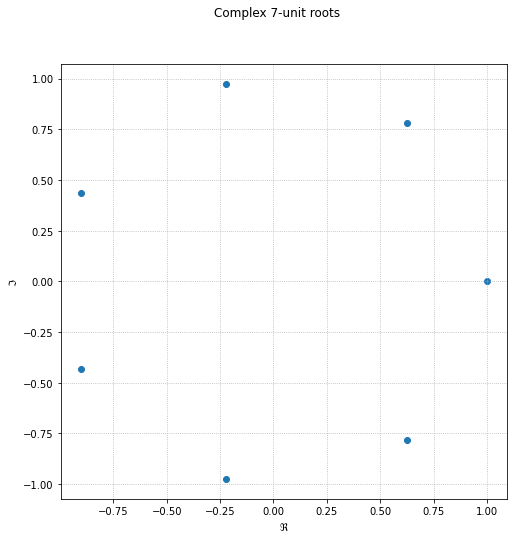

In [37]:
m = 7

numbers = [
    omega(m) ** nu
    for nu in range(m)
]

title = f'Complex {m}-unit roots'

plot_complex(numbers, title)

\begin{align*}
    A_0
    & :=
    \frac{1}{2 \pi i}
    \int_\Gamma
    A(\lambda)^{-1} \hat{V}
    d \lambda
    \in \mathbb{C}^{N \times j}, \\
    A_1
    & :=
    \frac{1}{2 \pi i}
    \int_\Gamma
    \lambda A(\lambda)^{-1} \hat{V}
    d \lambda
    \in \mathbb{C}^{N \times j}
\end{align*}

1. Berechne $A_0 \in \mathbb{C}^{N \times j}$

2. Berechne reduzierte Singulärwertzerlegung $A_0 = \tilde{V} \Sigma \tilde{W}^\ast$ mit $J$ Singulärwerten

3. Berechne $A_1 \in \mathbb{C}^{N \times j}$

4. Berechne die Eigenwerte der Matrix $\tilde{V} A_1 \tilde{W} \Sigma^{-1} \in \mathbb{C}^{j \times j}$ (z.B. mit QR-Verfahren)

In [5]:
def integral_method(A, m, R, z):

    """
    A ... matix-function
    m ... number of quadrature-nodes
    R ... ball-radius
    z ... ball-center
    """

    # constants
    j = 30
    N = 40

    # random matrix
    V_hat = np.random.random((N, j))

    # ------------------------ #
    # step 1

    # integrand of A_0
    def f_0(lamda):

        PLU = linalg.lu_factor(A(lamda))

        return np.array([
            linalg.lu_solve(PLU, V_hat[:, i])
            for i in range(j)
        ])

    A_0 = Q(m, f_0, R, z)

    # ------------------------ #
    # step 2

    V_tilde, Sigma, W_tilde = linalg.svd(A_0, full_matrices = False)

    # ------------------------ #
    # step 3

    # integrand of A_1
    f_1 = lambda lamda: lamda * f_0(lamda)

    A_1 = Q(m, f_1, R, z)

    # ------------------------ #
    # step 4

    return linalg.eig(V_tilde @ A_1 @ W_tilde @ Sigma ** -1)

# Testing

Um die Funktion `integral_method` zu testen, konstruieren wir einfache Matrix-Funktionen.

Die wohl einfachsten Matrix-Funktion sind konstant gleich einer Matrix.
Die Eigenwerte von Diagonalmatrizen stehen direkt in ihrer Diagonale.
Ähnliche Matrizen haben dieselben Eigenwerte.

Wir werden also für gegebene Eigenwerte `eigen_values` eine Diagonalmatrix `diagonal_matrix` erstellen und diese mit irgendeiner regulären Matrix `T` bzw. ihrer Inversen `T.inv()` von links und rechts multiplizieren.
Die dadurch entstandene Matrix `A_const` hat also die Eigenwerte `eigen_values`.
Jetzt müssen wir `A_const` nur noch zu einer konstanten Funktion `A` machen.

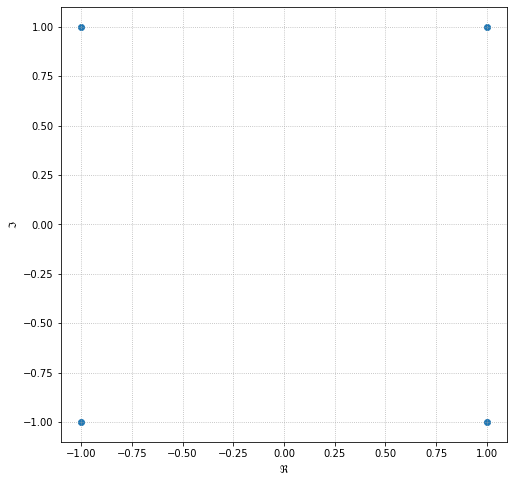

In [9]:
eigen_values = [1 + 1j, 1 - 1j, -1 + 1j, -1 - 1j]

plot_complex(eigen_values)

In [30]:
# diagonal matrix with eigen values in diagonal
diagonal_matrix = np.diag(eigen_values)

# transformation matrix
T = np.random.random(diagonal_matrix.shape)

# arbitrary matrix with known eigen values
A_const = T @ diagonal_matrix @ linalg.inv(T)

# function with constant output 'A_const'
A = lambda lamda: A_const

In [31]:
A_const

array([[ 1.73742633+2.05715037j, -2.24815039-1.32726185j,
         1.30448247+0.96679741j, -0.6729063 -1.2802025j ],
       [ 1.62217949+1.17208927j, -2.34709576-1.49820829j,
         0.78009795+1.62328825j, -0.39271851-1.3118804j ],
       [ 2.06154129+1.67973234j, -3.30292793-0.71008685j,
         0.74853732+1.78489981j,  0.14779024-2.18063474j],
       [ 1.57672959+2.57784153j, -4.36611017-1.1157396j ,
         2.21296561+1.21852253j, -0.13886789-2.34384189j]])

In [36]:
# confirmation
vals, vectors = linalg.eig(A_const)
vals

array([ 1.+1.j, -1.+1.j, -1.-1.j,  1.-1.j])

In [38]:
m = 10
R = 2
z = 0

integral_method(A, m, R, z)

ValueError: incompatible dimensions.